In [ ]:
!pip3 install wget
import wget

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!wget https://cdn.shopify.com/s/files/1/1297/3303/products/20-vinyl-roll-up-chess-board-21184102209_grande.jpg

--2021-07-09 11:54:14--  https://cdn.shopify.com/s/files/1/1297/3303/products/20-vinyl-roll-up-chess-board-21184102209_grande.jpg
Resolving cdn.shopify.com (cdn.shopify.com)... 151.101.129.12, 151.101.193.12, 151.101.65.12, ...
Connecting to cdn.shopify.com (cdn.shopify.com)|151.101.129.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11172 (11K) [image/jpeg]
Saving to: ‘20-vinyl-roll-up-chess-board-21184102209_grande.jpg’

20-vinyl-roll-up-ch 100%[===================>]  10.91K  --.-KB/s    in 0.001s  

2021-07-09 11:54:15 (19.3 MB/s) - ‘20-vinyl-roll-up-chess-board-21184102209_grande.jpg’ saved [11172/11172]



In [ ]:
import cv2

In [ ]:
image = cv2.imread('20-vinyl-roll-up-chess-board-21184102209_grande.jpg')

In [ ]:
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

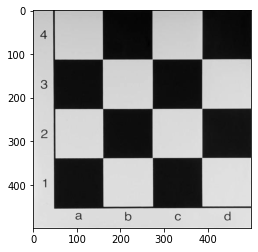

In [ ]:
plt.gray()

plt.imshow(grey_img)

In [ ]:
grey_img.shape

(499, 500)

In [ ]:
sobelX = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

In [ ]:
sobelY = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

In [ ]:
def getCoord(kernel):
    center_filter = [1, 1]
    xRows = [0, 0, 1, -1, 1, -1, 1, -1]
    yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
    for k in range(8):
      pixel_in_filter_x = center_filter[0] + xRows[k]
      pixel_in_filter_y = center_filter[1] + yCols[k]
      print('(cor {}, {}) - value: {}'.format(pixel_in_filter_x, pixel_in_filter_y, kernel[pixel_in_filter_x][pixel_in_filter_y]))

In [ ]:
getCoord(sobelX)

(cor 1, 0) - value: -2
(cor 1, 2) - value: 2
(cor 2, 1) - value: 0
(cor 0, 1) - value: 0
(cor 2, 0) - value: -1
(cor 0, 0) - value: -1
(cor 2, 2) - value: 1
(cor 0, 2) - value: 1


In [ ]:
import numpy as np

def conv(grey_img, kernel):
    transformed = np.copy(grey_img)
    m = transformed.shape[0]
    n = transformed.shape[1]
    print(m,n )

    for i in range(1, m - 1):
        for j in range(1, n - 1):
            center_pixel = [i, j]
            center_filter = [1, 1]
            xRows = [0, 0, 1, -1, 1, -1, 1, -1]
            yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
            # print(i, j)
            new_val = 0.0

            for k in range(8):
                item = [xRows[k], yCols[k]]
                pixel_in_image_x = center_pixel[0] + item[0]
                pixel_in_image_y = center_pixel[1] + item[1]
                pixel_in_filter_x = center_filter[0] + item[0]
                pixel_in_filter_y = center_filter[1] + item[1]

#                 print(pixel_in_image_x, pixel_in_image_y)
#                 print(pixel_in_filter_x, pixel_in_filter_y)

                new_val = new_val + (grey_img[pixel_in_image_x, pixel_in_image_y] * kernel[pixel_in_filter_x][pixel_in_filter_y])
            new_val = new_val + grey_img[i, j] * kernel[1][1]
            if new_val < 0:
                new_val = 0
            if new_val > 255:
                new_val = 255

#             print(new_val)
            transformed[i, j] = new_val * 1
    return transformed

In [ ]:
result1 = conv(grey_img, sobelX)

499 500


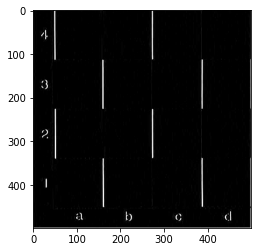

In [ ]:
plt.imshow(result1)
plt.show()

In [ ]:
result2 = conv(grey_img, sobelY)

499 500


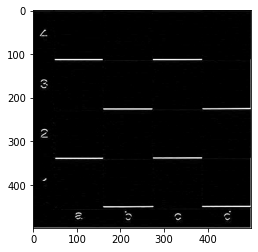

In [ ]:
plt.imshow(result2)
plt.show()

In [ ]:
def maxpool(image):
  m = len(image)
  n = len(image[0])
  new_image = np.zeros((m//2 + 1, n//2 + 1))
  # new_image = [[0 for _ in range(n//2 +1)] for _ in range(m//2 +1)]
  xRows = [1, 1, 0]
  yCols = [0, 1, 1]

  for i in range(0, m, 2):
    for j in range(0, n, 2):
      currentPixels = [image[i][j]]
      for k in range(3):
        neighbor_x = i + xRows[k]
        neighbor_y = j + yCols[k]
        if neighbor_x < m and neighbor_y < n:
          currentPixels.append(image[neighbor_x][neighbor_y])
        new_image[i//2][j//2] = max(currentPixels)
  return new_image


In [ ]:
result3 = maxpool(result1)

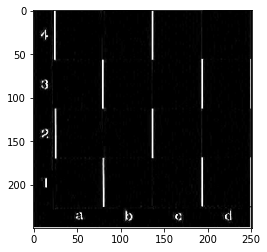

In [ ]:
plt.imshow(result3)
plt.show()

In [ ]:
result4 = maxpool(result2)

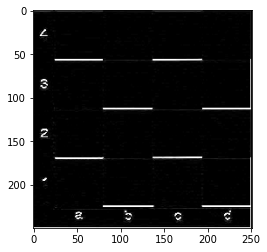

In [ ]:
plt.imshow(result4)
plt.show()